<a href="https://colab.research.google.com/github/singhamritanshu/machine_learning_algorithms_cse574/blob/main/using_autoencoder_to__reconstruct_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import warnings 
warnings.filterwarnings('ignore')
import numpy as np 
import tensorflow as tf
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Input, Dense 
#tf.logging.set_verbosity(tf.logging.ERROR)
#plotting
import matplotlib.pyplot as plt 
%matplotlib inline
#dataset
from tensorflow.keras.datasets import mnist

In [9]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

11490434/11490434 [==============================] - 0s 0us/step


In [10]:
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [11]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:]))) 
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [12]:
print(x_train.shape, x_test.shape)

(60000, 784) (10000, 784)


In [13]:
encoding_dim = 32
input_image = Input(shape=(784,))
encoder = Dense(encoding_dim, activation='relu')(input_image)

In [14]:
decoder = Dense(784, activation='sigmoid')(encoder)

In [16]:
model = Model(inputs=input_image, outputs=decoder)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(optimizer='adadelta', loss='binary_crossentropy')

In [27]:
model.fit(x_train, x_train)
model.fit(x_train, x_train, epochs=200, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

1875/1875 [==============================] - 4s 2ms/step - loss: 0.4981
Epoch 1/200
235/235 [==============================] - 2s 8ms/step - loss: 0.4847 - val_loss: 0.4810
Epoch 2/200
235/235 [==============================] - 2s 8ms/step - loss: 0.4818 - val_loss: 0.4780
Epoch 3/200
235/235 [==============================] - 2s 7ms/step - loss: 0.4788 - val_loss: 0.4750
Epoch 4/200
235/235 [==============================] - 2s 8ms/step - loss: 0.4759 - val_loss: 0.4720
Epoch 5/200
235/235 [==============================] - 2s 8ms/step - loss: 0.4729 - val_loss: 0.4690
Epoch 6/200
235/235 [==============================] - 2s 8ms/step - loss: 0.4699 - val_loss: 0.4660
Epoch 7/200
235/235 [==============================] - 2s 8ms/step - loss: 0.4669 - val_loss: 0.4631
Epoch 8/200
235/235 [==============================] - 2s 8ms/step - loss: 0.4640 - val_loss: 0.4601
Epoch 9/200
235/235 [==============================] - 2s 8ms/step - loss: 0.4610 - val_loss: 0.4571
Epoch 10/200
235/23

In [28]:
reconstructed_images = model.predict(x_test)

313/313 [==============================] - 0s 960us/step


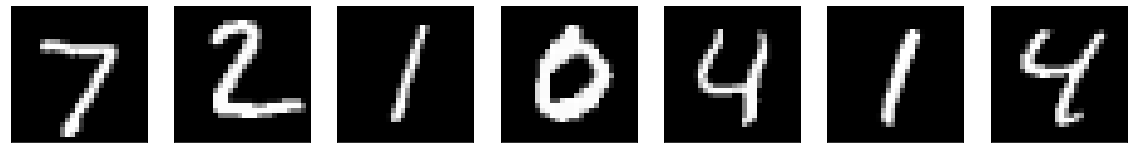

In [21]:
n=7
plt.figure(figsize=(20, 4))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(x_test[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

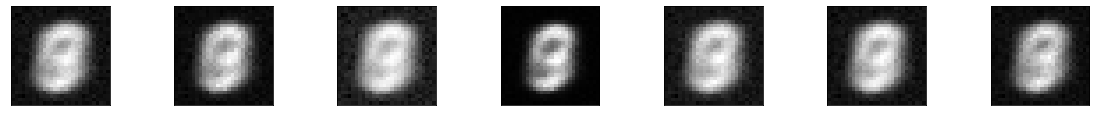

In [29]:
n=7
plt.figure(figsize=(20, 4)) 
for i in range(n):
  ax = plt.subplot(2, n, i + n + 1)
  plt.imshow(reconstructed_images[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()